# **Practical assignment for Topic 6**

Our imports.

In [ ]:
# Do not modify this code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

Our dataset.

In [ ]:
# Do not modify this code

np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

Create KNN model.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
#knn = KNeighborsRegressor(n_neighbors=10, weights='distance') # try weighted version as well
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

Plot the model.

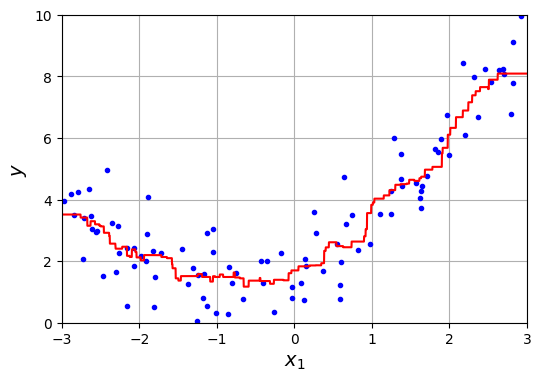

In [ ]:
# Do not modify this code

X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate the model using Cross-Validation.

In [ ]:
# Do not modify this code

yHat = cross_val_predict(knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


## **Task 1**

Create your own implementation of KNN which should output the same predictions for any k as the one implemented in scikit-learn library. Implement both, distance-weighted and unweighted KNN. The function should work correctly for any number of features, training set sizes, and query list set sizes.

*In the code of `predict()` you are allowed to use only the **numpy** library, i.e., you are **not allowed** to use **scikit-learn**.*

*You are **not allowed** to modify any given code in this class. You may only add additional code to the `predict()` function.*

In [ ]:
# import BaseEstimator for inheritance
from sklearn.base import BaseEstimator

# define our new class for KNN
class KNN(BaseEstimator):
  # initialization function for setting KNN parameters
  def __init__(self, k=10, weighted=False):
    self.k = k
    self.weighted = weighted

  # function for "fitting" our model. no actual fitting is done because this is KNN
  def fit(self, X, y):
    self.X = X
    self.y = y

  # function for prediction where the actual work is happening
  def predict(self, Xq):
    # the number of query data points
    n = len(Xq)
    # the array which we will fill with predicted values
    yHat = np.zeros(n)

    # loop through all query points. q is query index
    for q in range(0, n):
      # one current query point for which we will do prediction
      xquery = Xq[q, :]

      # compute distances from the query point to all training data points
      #TODO

      # find k nearest neighbors using the computed distances
      #TODO

      # compute weighted or unweighted prediction and store it in the yHat array
      if self.weighted:
        #TODO
      else:
        #TODO

    # return the array of predictions
    return yHat

Create a KNN model using the newly implemented class.

In [ ]:
my_knn = KNN(k=10)
#my_knn = KNN(k=10, weighted=True) # try weighted version as well
my_knn.fit(X, y)

Plot it.

*Note that the plot should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the plots and, if they are not the same, correct your code.*

In [ ]:
# Do not modify this code

X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = my_knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate it.

*Note that the evaluation result should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the results and, if they are not the same, correct your code.*

In [ ]:
# Do not modify this code

yHat = cross_val_predict(my_knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

## **Task 2**

Use the `KNeighborsRegressor` class to try KNN with k values from 1 to 20. Compute and print training MSE and 10-fold cross-validated MSE values for each k. Cross-validation should be done using `cross_val_predict()`. Draw a plot with two curves analogous to the plot shown in **slide 16 on the right** from today's lecture. Add a legend so that it is clear which curve is which.

In [ ]:
# Your code goes here


## **Task 3**
Explain the plot from Task 2. What exactly do we see in it and what conclusions can we make from it?

*Your answer goes here.*

---
**After the tasks are done, submit this file. Do not clear it's output - all print-outs and diagrams should be left in the file.**